In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=4755662384dc2a9af5ded6b0625c2bd062e52f0bb2d1e2fd3483f6801f5f3df9
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType , StructField,IntegerType,DoubleType,StringType
spark=SparkSession.builder.appName('BDA_MINI_PROJECT').enableHiveSupport().getOrCreate()
spark

In [ ]:
data=spark.read.csv('/content/drive/MyDrive/BDA_MINI_PROJECT/beatsdataset.csv',header=True)
data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- 1-ZCRm: string (nullable = true)
 |-- 2-Energym: string (nullable = true)
 |-- 3-EnergyEntropym: string (nullable = true)
 |-- 4-SpectralCentroidm: string (nullable = true)
 |-- 5-SpectralSpreadm: string (nullable = true)
 |-- 6-SpectralEntropym: string (nullable = true)
 |-- 7-SpectralFluxm: string (nullable = true)
 |-- 8-SpectralRolloffm: string (nullable = true)
 |-- 9-MFCCs1m: string (nullable = true)
 |-- 10-MFCCs2m: string (nullable = true)
 |-- 11-MFCCs3m: string (nullable = true)
 |-- 12-MFCCs4m: string (nullable = true)
 |-- 13-MFCCs5m: string (nullable = true)
 |-- 14-MFCCs6m: string (nullable = true)
 |-- 15-MFCCs7m: string (nullable = true)
 |-- 16-MFCCs8m: string (nullable = true)
 |-- 17-MFCCs9m: string (nullable = true)
 |-- 18-MFCCs10m: string (nullable = true)
 |-- 19-MFCCs11m: string (nullable = true)
 |-- 20-MFCCs12m: string (nullable = true)
 |-- 21-MFCCs13m: string (nullable = true)
 |-- 22-ChromaVector1m: string (nulla

In [ ]:
data.show()

+---+---------------+---------------+----------------+-------------------+-----------------+------------------+----------------+------------------+--------------+--------------+----------------+----------------+-----------------+----------------+-----------------+-----------------+----------------+----------------+------------------+-----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+-------------------+---------------+---------------+-------------------+----------------------+--------------------+---------------------+------------------+---------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------------+-----------------

In [ ]:
column_name=data.columns
new_column_name=list(map(lambda x:x.lstrip('0123456789-'),column_name))

In [ ]:
fields = [StructField('S_NO', StringType())] + [StructField(i, DoubleType()) for i in new_column_name[1:-1]] + [StructField('Class', StringType())]
my_schema = StructType(fields)

In [ ]:
data=spark.read.csv('/content/drive/MyDrive/BDA_MINI_PROJECT/beatsdataset.csv',header=True,schema=my_schema)

In [ ]:
len(data.columns)

73

In [ ]:
data.printSchema()

root
 |-- S_NO: string (nullable = true)
 |-- ZCRm: double (nullable = true)
 |-- Energym: double (nullable = true)
 |-- EnergyEntropym: double (nullable = true)
 |-- SpectralCentroidm: double (nullable = true)
 |-- SpectralSpreadm: double (nullable = true)
 |-- SpectralEntropym: double (nullable = true)
 |-- SpectralFluxm: double (nullable = true)
 |-- SpectralRolloffm: double (nullable = true)
 |-- MFCCs1m: double (nullable = true)
 |-- MFCCs2m: double (nullable = true)
 |-- MFCCs3m: double (nullable = true)
 |-- MFCCs4m: double (nullable = true)
 |-- MFCCs5m: double (nullable = true)
 |-- MFCCs6m: double (nullable = true)
 |-- MFCCs7m: double (nullable = true)
 |-- MFCCs8m: double (nullable = true)
 |-- MFCCs9m: double (nullable = true)
 |-- MFCCs10m: double (nullable = true)
 |-- MFCCs11m: double (nullable = true)
 |-- MFCCs12m: double (nullable = true)
 |-- MFCCs13m: double (nullable = true)
 |-- ChromaVector1m: double (nullable = true)
 |-- ChromaVector2m: double (nullable = true

In [ ]:
data.show()

+----+---------------+---------------+--------------+-----------------+---------------+----------------+----------------+----------------+--------------+--------------+----------------+----------------+-----------------+----------------+-----------------+-----------------+----------------+----------------+-----------------+-----------------+----------------+----------------+----------------+---------------+----------------+----------------+----------------+---------------+----------------+----------------+----------------+---------------+----------------+----------------+---------------+---------------+----------------+-------------------+-----------------+------------------+----------------+------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+

In [ ]:
class_col = data.select('class').distinct()
print(class_col.count())
class_col.show()

23
+--------------------+
|               class|
+--------------------+
|           PsyTrance|
|           HardDance|
|              Breaks|
|  HardcoreHardTechno|
|   IndieDanceNuDisco|
|              Trance|
|           DeepHouse|
|ElectronicaDowntempo|
|           ReggaeDub|
|             Minimal|
|         DrumAndBass|
|             Dubstep|
|             BigRoom|
|              Techno|
|               House|
|         FutureHouse|
|        ElectroHouse|
|           GlitchHop|
|           TechHouse|
|              HipHop|
+--------------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import *
null_counts = data.select([sum(col(column).isNull().cast("int")).alias(column) for column in data.columns[1:]])

In [ ]:
null_counts.show()

+----+-------+--------------+-----------------+---------------+----------------+-------------+----------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+--------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+---------------+---------------+---------------+----------------+------+---------+----------------+-------------------+-----------------+------------------+---------------+------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------+----------+----------+----------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+------------------+---+-------+-----------+-----+
|ZCRm|Energym|EnergyEntropym|SpectralCentroidm|SpectralSpreadm|S

In [ ]:
(train,test)=data.randomSplit([0.8,0.2])

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.pipeline import Pipeline
numeric_columns = data.select(data.columns[1:-1]).columns

In [ ]:
vector_assembler = VectorAssembler(inputCols=numeric_columns, outputCol="features")
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
indexer=StringIndexer(inputCol="Class",outputCol="F_Class")

### Decision Tree

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'scaled_features', labelCol='F_Class', maxDepth = 5)

In [ ]:
stages=[vector_assembler,scaler,indexer,dt]
pipeline=Pipeline(stages=stages)
dt_model=pipeline.fit(train)

In [ ]:
dt_pred = dt_model.transform(test)

In [ ]:
dt_pred.select('F_Class','prediction').show(5)

+-------+----------+
|F_Class|prediction|
+-------+----------+
|   15.0|       6.0|
|   18.0|      13.0|
|   13.0|       3.0|
|   13.0|      13.0|
|   13.0|      13.0|
+-------+----------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator()
evaluator.setLabelCol("F_Class")
evaluator.setPredictionCol("prediction")
print("Accuracy : ",evaluator.evaluate(dt_pred))

Accuracy :  0.33568266685459924


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
paramGrid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [3, 5, 7]) \
    .addGrid(dt.minInstancesPerNode, [1, 3, 5]) \
    .build()
crossval = CrossValidator(estimator=pipeline, estimatorParamMaps=paramGrid,
                      evaluator=MulticlassClassificationEvaluator(
                      labelCol='F_Class', predictionCol='prediction', metricName='accuracy'),
                      numFolds=5)

cvModel = crossval.fit(train)

best_model = cvModel.bestModel

predictions = best_model.transform(test)

evaluator = MulticlassClassificationEvaluator(labelCol="F_Class", predictionCol="prediction", metricName="accuracy")
dt_acc = evaluator.evaluate(predictions)

print(f"Test Accuracy: {dt_acc:.2f}")

Test Accuracy: 0.39


## RandomForest

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol="scaled_features",labelCol="F_Class")

In [ ]:
stages=[vector_assembler,scaler,indexer,rf]
pipeline=Pipeline(stages=stages)
rf_model=pipeline.fit(train)

In [ ]:
rf_pred = rf_model.transform(test)

In [ ]:
rf_pred.select('F_Class','prediction').show(5)

+-------+----------+
|F_Class|prediction|
+-------+----------+
|   15.0|      15.0|
|   18.0|      18.0|
|   13.0|       3.0|
|   13.0|      13.0|
|   13.0|      13.0|
+-------+----------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator()
evaluator.setLabelCol("F_Class")
evaluator.setPredictionCol("prediction")
rf_acc = evaluator.evaluate(rf_pred)
print("Accuracy : ",evaluator.evaluate(rf_pred))

Accuracy :  0.41443873489359473


## Logistic Regression

In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(maxIter=10, featuresCol = 'scaled_features', labelCol='F_Class')

In [ ]:
stages=[vector_assembler,scaler,indexer,lr]
pipeline=Pipeline(stages=stages)
lr_model=pipeline.fit(train)

In [ ]:
lr_pred = lr_model.transform(test)

In [ ]:
lr_pred.select('F_Class','prediction').show(5)

+-------+----------+
|F_Class|prediction|
+-------+----------+
|   15.0|      19.0|
|   18.0|      18.0|
|   13.0|       0.0|
|   13.0|      13.0|
|   13.0|      13.0|
+-------+----------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator()
evaluator.setLabelCol("F_Class")
evaluator.setPredictionCol("prediction")
lr_acc = evaluator.evaluate(lr_pred)
print("Accuracy : ",evaluator.evaluate(lr_pred))

Accuracy :  0.42034656803583587


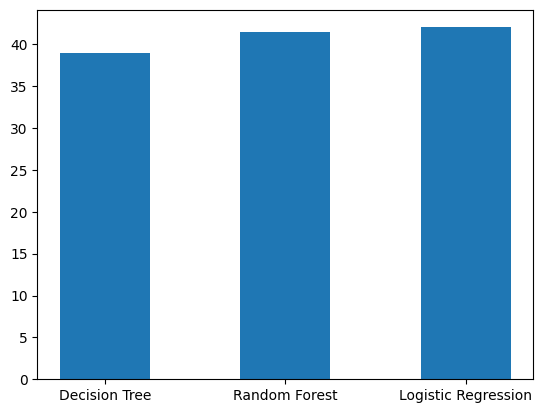

In [ ]:
import matplotlib.pyplot as plt
acc = [dt_acc*100,rf_acc*100,lr_acc*100]
acc1 = ["Decision Tree","Random Forest","Logistic Regression"]
plt.bar(acc1,acc,width=0.5)
plt.show()